In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("Housing.csv")

In [5]:
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
dataset.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
dataset.shape

(545, 13)

In [9]:
X = dataset.iloc[:,[1]].values
y = dataset.iloc[:,0].values

In [10]:
X.shape

(545, 1)

In [11]:
y

array([13300000, 12250000, 12250000, 12215000, 11410000, 10850000,
       10150000, 10150000,  9870000,  9800000,  9800000,  9681000,
        9310000,  9240000,  9240000,  9100000,  9100000,  8960000,
        8890000,  8855000,  8750000,  8680000,  8645000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8400000,  8400000,
        8400000,  8400000,  8295000,  8190000,  8120000,  8080940,
        8043000,  7980000,  7962500,  7910000,  7875000,  7840000,
        7700000,  7700000,  7560000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7420000,  7420000,  7350000,  7350000,
        7350000,  7350000,  7343000,  7245000,  7210000,  7210000,
        7140000,  7070000,  7070000,  7035000,  7000000,  6930000,
        6930000,  6895000,  6860000,  6790000,  6790000,  6755000,
        6720000,  6685000,  6650000,  6650000,  6650000,  6650000,
        6650000,  6650000,  6629000,  6615000,  6615000,  6580000,
        6510000,  6510000,  6510000,  6475000,  6475000,  6440

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
print(regressor.intercept_)

2329244.913495152


In [15]:
print(regressor.coef_)

[475.26784571]


In [16]:
y_pred = regressor.predict(X_test)

In [17]:
df = pd.DataFrame({"Actual" : y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,4585000,4.230316e+06
1,6083000,6.901322e+06
2,4007500,3.973672e+06
3,6930000,8.602780e+06
4,2940000,4.068725e+06
...,...,...
104,6650000,5.380464e+06
105,5810000,4.800638e+06
106,4123000,5.209368e+06
107,3080000,4.467950e+06


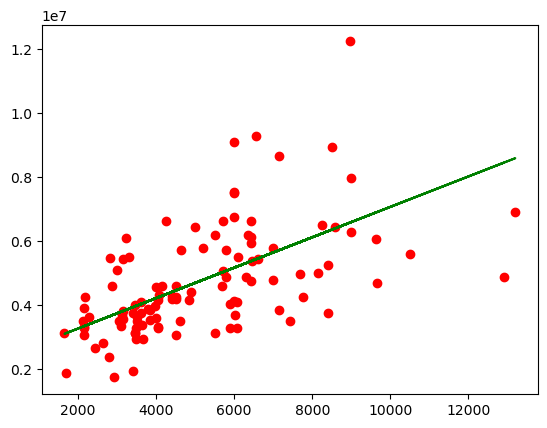

In [18]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, y_pred, color = "green")

In [19]:
from sklearn import metrics
print("Mean Absoulte Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R Squared:", metrics.r2_score(y_test, y_pred))

Mean Absoulte Error: 1026553.7662016952
Mean Squared Error: 1997672371756.0862
Root Mean Squared Error: 1413390.3819384389
R Squared: 0.3067292122216638


# Multiple Linear Regression

In [20]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
dataset[varlist] = dataset[varlist].apply(binary_map)


In [21]:
dataset.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


In [22]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:,0].values

In [23]:
X.shape

(545, 11)

In [24]:
y.shape

(545,)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
"""
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
"""

'\n# Feature Scaling\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)\n'

In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [50]:
print(regressor.intercept_)

-369519.98496834375


In [51]:
print(regressor.coef_)

[2.56222994e+02 1.45780321e+05 1.01760742e+06 4.39078612e+05
 4.79544557e+05 4.39031440e+05 3.55803818e+05 1.24774913e+06
 8.96154689e+05 2.44238747e+05 7.10967126e+05]


In [52]:
y_pred = regressor.predict(X_test)

In [53]:
df = pd.DataFrame ({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,4585000,3.712261e+06
1,6083000,6.024165e+06
2,4007500,4.371597e+06
3,6930000,7.088206e+06
4,2940000,3.047142e+06
...,...,...
104,6650000,7.151890e+06
105,5810000,5.110723e+06
106,4123000,4.011025e+06
107,3080000,4.942341e+06


<AxesSubplot:>

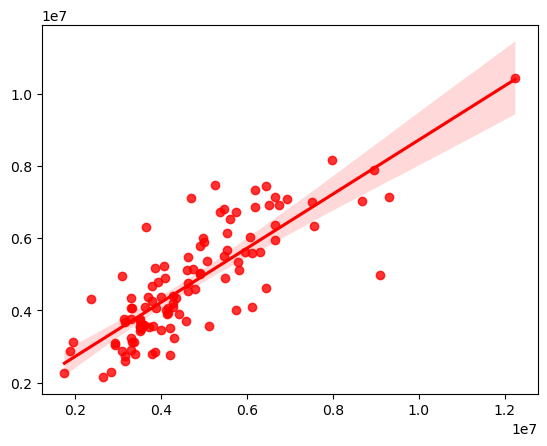

In [54]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred, color="r")

In [55]:
#sns.pairplot(dataset, hue="price")

In [56]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R Squared:", metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 713037.7581358049
Mean Squared Error: 968194995604.5693
Root Mean Squared Error: 983969.0013433194
R Squared: 0.6639983028169056
